In [163]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Параметры функции
T = 2  # Период
L = T / 2

# Определим переменную x
x = sp.symbols('x')

# Определим функцию f(x)
f_piecewise = sp.Piecewise((3*x - 1, (x >= 0) & (x < 1)), (0, (x >= 1) & (x <= 2)))

# Вычислим a0
a0 = (2 / T) * sp.integrate(f_piecewise, (x, 0, T))
a0 = sp.simplify(a0)

# Вычислим an и bn
def fourier_coefficients(n, L, f, T):
    a_n = (2 / T) * sp.integrate(f * sp.cos(3 * np.pi * n * x / T), (x, 0, T))
    b_n = (2 / T) * sp.integrate(f * sp.sin(3 * np.pi * n * x / T), (x, 0, T))
    return sp.simplify(a_n), sp.simplify(b_n)

# Преобразуем в символьные выражения
N = 10  # Число членов ряда Фурье для вычисления
a_n_list = []
b_n_list = []

for n in range(1, N + 1):
    a_n, b_n = fourier_coefficients(n, L, f_piecewise, T)
    a_n_list.append(a_n)
    b_n_list.append(b_n)

# Печать коэффициентов
print(a0)
print(a_n_list)
print(b_n_list)

0.500000000000000
[-0.559508093101505, -0.0675474557615584, 0.126460514801338, -7.80625564189563e-17, -0.0902864327766022, -0.00750527286239531, 0.0578734155005224, -7.80625564189563e-17, -0.0488248585892420, -0.00270189823046211]
[-0.347301502312311, 0.106103295394597, -0.0557249845382739, -0.159154943091895, -0.0478451146187632, 0.0353677651315323, -0.0275581882449232, -0.0795774715459477, -0.0252463485015537, 0.0212206590789194]


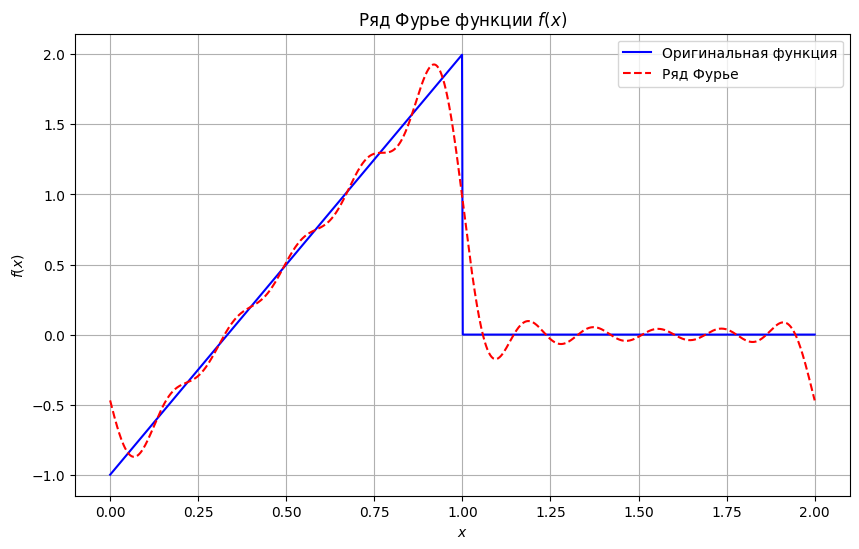

In [164]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Параметры
x = sp.symbols('x')
T = 2  # Период

# Функция
f = sp.Piecewise((3*x - 1, (x >= 0) & (x < 1)), (0, (x >= 1) & (x <= 2)))

# Коэффициенты Фурье
a0 = (2/T) * (sp.integrate(3*x-1, (x, 0, 1)) + sp.integrate(0, (x, 1, 2)))
a0_val = a0.evalf()

# Коэффициенты a_n и b_n
n = sp.symbols('n', integer=True)
a_n = (2/T) * (sp.integrate((3*x-1) * sp.cos(2 * sp.pi * n * x / T), (x, 0, 1)) + 
               sp.integrate(0 * sp.cos(2 * sp.pi * n * x / T), (x, 1, 2)))
b_n = (2/T) * (sp.integrate((3*x-1) * sp.sin(2 * sp.pi * n * x / T), (x, 0, 1)) + 
               sp.integrate(0 * sp.sin(2 * sp.pi * n * x / T), (x, 1, 2)))

# Вычислим коэффициенты для первых нескольких гармоник
N = 10  # Число членов ряда Фурье для вычисления
a_n_vals = [a_n.subs(n, i).evalf() for i in range(1, N+1)]
b_n_vals = [b_n.subs(n, i).evalf() for i in range(1, N+1)]

# Функция для построения ряда Фурье
def fourier_series(x_val, a0, a_n_vals, b_n_vals, T, N):
    result = a0 / 2
    for n in range(1, N + 1):
        result += a_n_vals[n-1] * np.cos(2 * np.pi * n * x_val / T) + b_n_vals[n-1] * np.sin(2 * np.pi * n * x_val / T)
    return result

# Построение графика
x_vals = np.linspace(0, 2, 1000)
f_vals = [fourier_series(xi, a0_val, a_n_vals, b_n_vals, T, N) for xi in x_vals]

# Оригинальная функция
f_original = lambda x: 3*x-1 if x < 1 else 0
f_original_vals = [f_original(xi) for xi in x_vals]

# Построим график
plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_original_vals, label='Оригинальная функция', color='blue')
plt.plot(x_vals, f_vals, label='Ряд Фурье', color='red', linestyle='--')
plt.title('Ряд Фурье функции $f(x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)
plt.show()


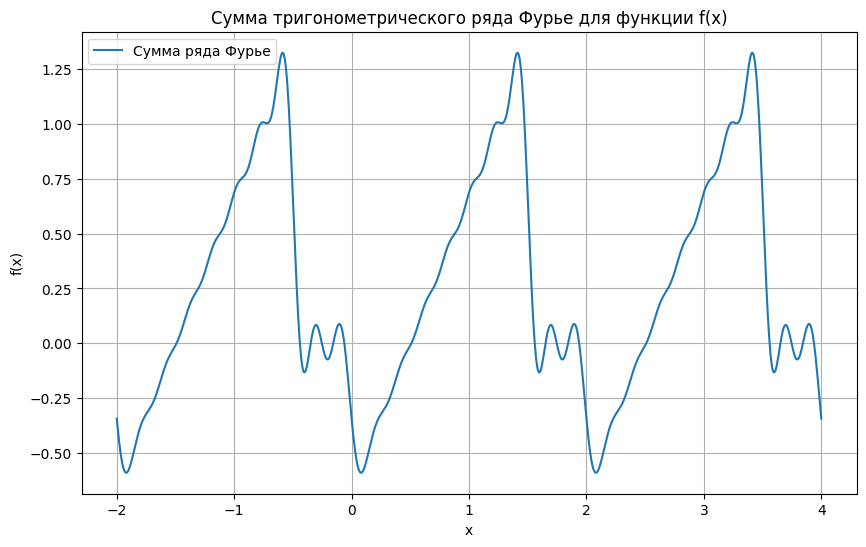

In [165]:

# Определяем функцию для суммы ряда Фурье
def fourier_series(x, a0, a_n_list, b_n_list, N, T):
    result = a0 / 2
    for n in range(1, N + 1):
        result += a_n_list[n-1] * np.cos(2 * np.pi * n * x / T) + b_n_list[n-1] * np.sin(2 * np.pi * n * x / T)
    return result

# Определяем диапазон x для построения графика
x_vals = np.linspace(-T, 2*T, 1000)
y_vals = []

# Вычисляем значения ряда Фурье в точках x_vals
for val in x_vals:
    y_vals.append(fourier_series(val, a0, a_n_list, b_n_list, N, T))

# Преобразуем список в массив для удобства
y_vals = np.array(y_vals, dtype=np.float64)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='Сумма ряда Фурье')
plt.title('Сумма тригонометрического ряда Фурье для функции f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


1.00000000000000
[-2.43170840741611, -2.77555756156289e-16, -0.270189823046234, -3.19189119579733e-16, -0.0972683362966439, -3.12250225675825e-16, -0.0496267021921651, -3.12250225675825e-16, -0.0300210914495813, -3.12250225675825e-16]


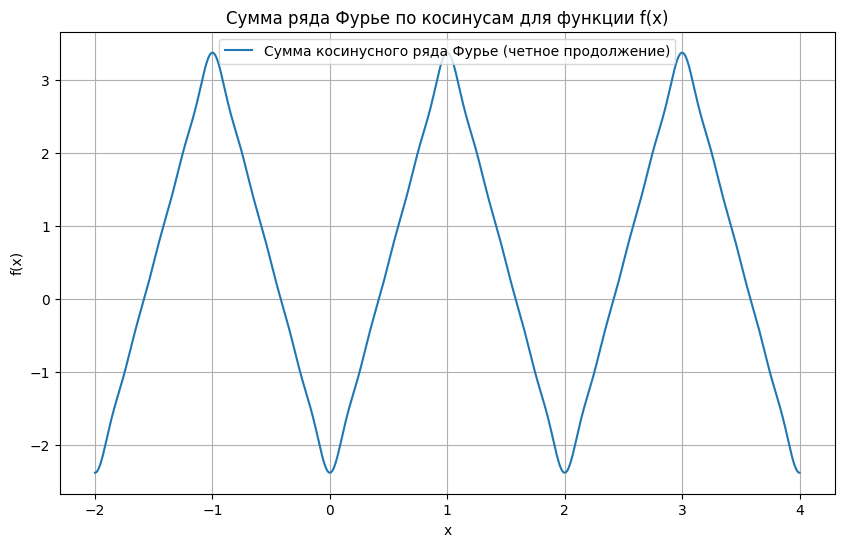

In [166]:
# Определим кусочную функцию для четного продолжения
f_even_piecewise = sp.Piecewise((3*abs(x)-1, (x >= -2) & (x < 2)), (0, (abs(x) >= 1) & (abs(x) <= 2)))

# Вычислим a0
a0_even = (1 / L) * sp.integrate(f_even_piecewise, (x, -L, L))
a0_even = sp.simplify(a0_even)

# Вычислим an для косинусного ряда Фурье
def cosine_coefficients(n, L, f, T):
    a_n = (2 / L) * sp.integrate(f * sp.cos(n * np.pi * x / L), (x, -L, L))
    return sp.simplify(a_n)

# Число членов ряда Фурье
N = 10
a_n_even_list = []

for n in range(1, N + 1):
    a_n = cosine_coefficients(n, L, f_even_piecewise, T)
    a_n_even_list.append(a_n)

# Печать коэффициентов
print(a0_even)
print(a_n_even_list)

# Определяем функцию для суммы косинусного ряда Фурье
def cosine_fourier_series(x, a0, a_n_list, N, L):
    result = a0 / 2
    for n in range(1, N + 1):
        result += a_n_list[n-1] * np.cos(n * np.pi * x / L)
    return result

# Вычисляем значения ряда Фурье в точках x_vals для четного продолжения
y_vals_even = []

for val in x_vals:
    y_vals_even.append(cosine_fourier_series(val, a0_even, a_n_even_list, N, L))

y_vals_even = np.array(y_vals_even, dtype=np.float64)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals_even, label='Сумма косинусного ряда Фурье (четное продолжение)')
plt.title('Сумма ряда Фурье по косинусам для функции f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

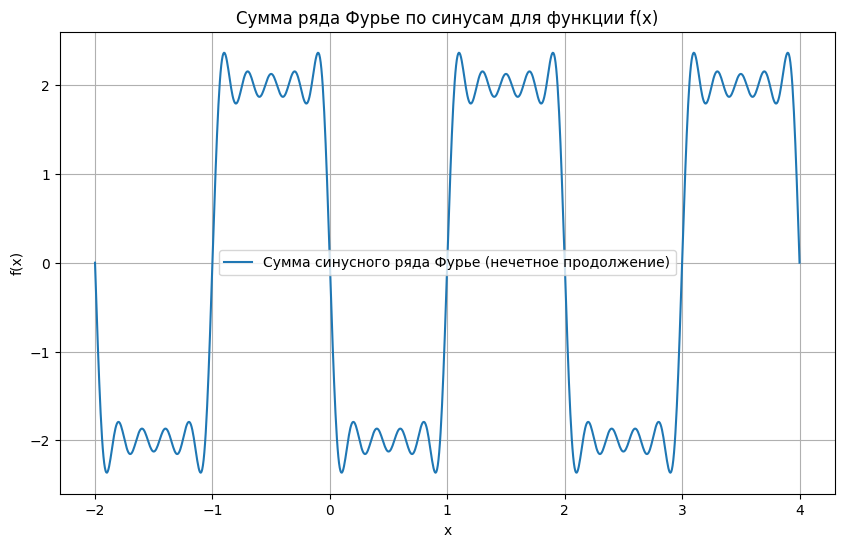

In [167]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Параметры функции
T = 2  # Период
L = T / 2

# Определим переменную x
x = sp.symbols('x')

# Определим кусочную функцию для нечетного продолжения
f_odd_piecewise = sp.Piecewise((3*x-1, (x >= 0) & (x < 1)), 
                               (0, (x >= 1) & (x <= 2)),
                               (-3*x + 1, (x >= -1) & (x < 0)), 
                               (0, (x >= -2) & (x <= -1)))

# Вычислим bn для синусного ряда Фурье
def sine_coefficients(n, L, f):
    b_n = (2 / L) * sp.integrate(f * sp.sin(n * np.pi * x / L), (x, -L, L))
    return sp.simplify(b_n)

# Число членов ряда Фурье
N = 10
b_n_odd_list = []

for n in range(1, N + 1):
    b_n = sine_coefficients(n, L, f_odd_piecewise)
    b_n_odd_list.append(b_n)

# Печать коэффициентов
b_n_odd_list

# Определяем функцию для суммы синусного ряда Фурье
def sine_fourier_series(x, b_n_list, N, L):
    result = 0
    for n in range(1, N + 1):
        result += b_n_list[n-1] * np.sin(n * np.pi * x / L)
    return result

# Определяем диапазон x для построения графика
x_vals = np.linspace(-2, 4, 1000)  # От -L до 2L
y_vals_odd = []

# Вычисляем значения ряда Фурье в точках x_vals для нечетного продолжения
for val in x_vals:
    y_vals_odd.append(sine_fourier_series(val, b_n_odd_list, N, L))

y_vals_odd = np.array(y_vals_odd, dtype=np.float64)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals_odd, label='Сумма синусного ряда Фурье (нечетное продолжение)')
plt.title('Сумма ряда Фурье по синусам для функции f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()